# MA323 Report

## Problem 1a)

### Methodology
To approximate $\bf{I_1 = \int_{0}^{4} \frac{1}{(2+cos(x))^2} dx}$ numerically, I have applied the trapezoidal rule **(Section 1.1.3)**. That is,
\begin{align}
I_1 &= \int_{0}^{4} \frac{1}{(2+cos(x))^2} dx\\
&= \int_{0}^{4} g(x) dx\\
&\approx h\left( \frac{g(0) + g(4)}{2} + \sum_{i=1}^{n-1} g \left(ih \right) \right)\\ 
&=T(h)
\end{align} 
where $\bf{h = \frac{4}{n}} $ and $ \bf{g(x) =  \frac{1}{(2+cos(x))^2}} $.

However, to ensure that the approximation error is guaranteed to be $\leq$ 0.01, I first identified the minimum number of interpolation points such that the total error is bounded by 0.01. I.e. find **n** such that...

\begin{align}
\textrm{Total Error} = T(h) - \int_0^4 g(x) dx = \frac{h^2(4-0)}{12} g''(\xi) \leq 0.01
\end{align}
where 

\begin{align}
& g'(x) = \frac{2sin(x)}{(2+cos(x))^3} \\
& g''(x) = \frac{2cos(x)}{(2+cos(x))^3} + \frac{6sin^2(x)}{(2+cos(x))^4} .
\end{align}

**Note**: we can do this because $g \in C^2[0, 4]$, i.e. twice differentiable for the interval $[0,4]$.

To find the upper bound of the Total Error, we must first maximise $g''(x)$ on $(0,4)$. Let $\xi^* \in (0,4)$ take the value which maximises $g''$ on $(0,4)$. This gives us

\begin{align}
\frac{h^2(4-0)}{12} g''(\xi^*) = 0.01 \\
\end{align}

therefore

\begin{align}
n = \sqrt{\frac{1600}{3}g''(\xi^*)} .
\end{align}

### Application and Results

In [1]:
# Importing packages I will need
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# Defining the second derivative of g(x)
def g_2(x):
    y = 2*np.cos(x)/(2+np.cos(x))**3 + 6*np.sin(x)**2/(2+np.cos(x))**4
    return y

# Minimising -g(x) which is same as maximising g(x)
optimizer = opt.minimize(lambda x: -g_2(x),2);
print(optimizer)

      fun: -0.5925925925925184
 hess_inv: array([[0.27993881]])
      jac: array([-7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.0943949])


In [3]:
# Since we can see above that x falls in the bounds [0,4], we may continue using this maximum of 0.5925...
g2_max = -optimizer['fun']

# Applying the function defined above to find the number of interpolations.
n = np.sqrt(1600/3 * g2_max)
print(n)

17.777777777776667


In [4]:
n = int(np.ceil(n))   # We want the next integer value after n
print(n)

h = 4/n

# Defining the integrand
def g(x):
    y = (2+np.cos(x))**(-2)
    return y

18


In [5]:
# Generating a sequence with increments of size h.
seq = np.linspace(h, 4-h, n-1)

# This is my trapezoidal approximation
I_1 = h*(0.5*(g(0)+g(4))+np.sum(g(seq)))

print('My trapezoidal approximation of the integral is: {:.4f}.'.format(I_1)) 

My trapezoidal approximation of the integral is: 1.9100.


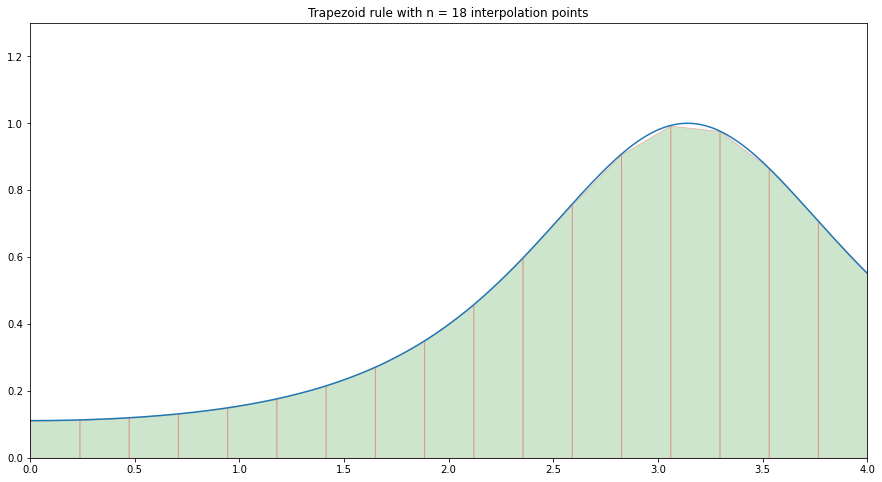

In [6]:
# Creating a sequence of 1000 values of x between 0 and 4 with equal increments.
x =np.linspace(0,4,1000)
y = g(x)

fix, ax = plt.subplots(figsize = (15,8))
ax.plot(x,y)   # Plotting the graph of g
ax.set_xlim([0, 4]); ax.set_ylim([0, 1.3]);   # Setting axis limits

x_trapez = np.linspace(0,4,n)
y_trapez = g(x_trapez)

for i in range(n - 1):
    xs = [x_trapez[i], x_trapez[i+1]]
    ys = [g(x_trapez[i]), g(x_trapez[i+1])]
    ax.fill_between(xs, ys, edgecolor='red', facecolor='g', alpha=0.2)

plt.title('Trapezoid rule with n = {} interpolation points'.format(n));

To check the accuracy of my numerical approximation, I decided to use a Monte Carlo estimator **(Section 3.2)** to estimate the integral since I cannot find a analytical solution.

\begin{align}
I_1 &= \int_0^4 \frac{1}{(2+cos(x))^2} dx \\
&= 4 \int_0^4 \frac{1}{(2+cos(x))^2} \frac{1}{4} dx \\
&= 4\mathbb{E} \left(\frac{1}{(2+cos(X))^2} \right)
\end{align}

where $X \sim \mathcal{U} (0,4)$.

Therefore, the MC estimator is

\begin{align}
I_1^{MC} &= 4 \frac{1}{n} \sum_{i=1}^n \left(\frac{1}{(2+cos(U_i))^2} \right)
\end{align}

where $U_i \sim \mathcal{U}[0, 4]$ for $i = 1, 2, 3 \ldots$ I also applied the antithetic variable $Y_i = 4 - U_i$ to reduce the variance of my estimation of $I_1$.

**Note:** I will explain in the next part how antithetic variables work in more detail.


In [7]:
rng = np.random.default_rng(seed=56473)
U = rng.random(10**5)*4

Y = (g(U)+g(4-U))/2

I_1_MC = 4*np.mean(Y)

print('My trapezoidal approximation of the integral is: {:.4f}.'.format(I_1)) 
print('My Monte-Carlo estimation of the integral is   : {:.4f}.'.format(I_1_MC)) 

My trapezoidal approximation of the integral is: 1.9100.
My Monte-Carlo estimation of the integral is   : 1.9113.


Although the Monte-Carlo estimation is not the exact solution, it is very accurate therefore the Monte-Carlo estimation supports the trapezodal approximation.

## Question 1b)

### Methodology

The first step to estimating $I_2$ using a MC estimator is to transform the integral so that the bounds are finite in order for me to use the uniform for estimating the integral. The transformation I will be using is $\bf{y=e^{\frac{-x^2}{2}}}$ which gives $\bf{dx = -\frac{1}{x}e^{\frac{x^2}{2}}dy}$, and $\bf{x = \sqrt{-2\ln{y}}}$. Applying this to $I_2$ gives me

\begin{align}
I_2 &= \int_{0}^{\infty} x^{\frac{3}{2}}e^{-\frac{x^2}{2}} dx \\
&= \int_{1}^{0} x^{\frac{3}{2}}e^{-\frac{x^2}{2}} \cdot \left( -\frac{1}{x} e^{\frac{x^2}{2}} \right) dy \\
&= \int_{0}^{1} \sqrt{x} dy \\
&= \int_{0}^{1} (-2 \ln{y})^{\frac{1}{4}} dy \\
&= \mathbb{E} (-2 \ln{Y})^{\frac{1}{4}})
\end{align}

where $Y \sim \mathcal{U}[0,1]$. Therefore my MC estimator of $I_2$ is

\begin{align}
I_2^{MC} = \frac{1}{n} \sum_{i=1}^{n} (-2\ln U_i)^\frac{1}{4}
\end{align}

where $U_i \sim \mathcal{U}[0,1]$ for $i = 1,2,3 \ldots$


**Note**: I could apply other transformations such as $y= \frac{1}{1+x}$ and $y= e^{-x}$. 

**Extra**: Although transforming the integral such that the bounds are finite make variance reduction techniques much simpler later on, an alternative could be to apply the transformation $y = x^2$ then sampling from an Exponential distribution to compute the Monte-Carlo estimator.

### Variance Reduction
The variance reduction methods I will be using are antithetic variables and control variables.

#### Antithetic Variable (Section 4.2)
Recall that if $U \sim \mathcal{U} (0,1)$ then $1-U \sim \mathcal{U} (0,1)$ also. Therefore it is very computationally cheap to obtain a larger sample of the uniform by taking $1-U$ compared to sampling a further $n$ random variables. Applying this gives us the antithetic pair $(U, 1-U)$ which yields
\begin{align}
\overline{X}_n &=\frac{1}{n} \sum_{i=1}^{n} (-2\ln U_i)^\frac{1}{4} \\
\overline{Y}_n &=\frac{1}{n} \sum_{i=1}^{n} (-2\ln (1-U_i))^\frac{1}{4} \\
\end{align}

giving us the antithetic MC estimator

\begin{align}
I_2^{Antithetic} &=  \frac{\overline{X}_n+ \overline{Y}_n}{2}
\end{align}

Not only does this reduce the variance of the MC estimator because we have a larger sample size, but the covariance of the antithetic pair is also negative which reduces it even further. We can see this by computing the variance of the antithetic MC estimator as follows

\begin{align*}
{\rm Var} (I_2^{Antithetic})
& = {\rm Var} \left( \frac{\overline{X}_n + \overline{Y}_n}{2} \right) \\
& = {\rm Var} \left(\frac1{2n}\sum_{i=1}^n (X_i+Y_i)\right) \\
& = \frac{1}{4n^2} {\rm Var} \left(\sum_{i=1}^n (X_i+Y_i)\right) \\
&= \frac{1}{4n} {\rm Var} \left( X_i+Y_i \right) \\
& = \frac{1}{4n} \left({\rm Var} (X_i) + 2{\rm Cov} (X_i,Y_i) + {\rm Var} (Y_i)
\right) \\
& = \frac{1}{2n} \left({\rm Var} (X) + {\rm Cov} (X,Y) \right).
\end{align*}

Therefore even with half of the original sample size, antithetic variables will have a smaller variance than a standard MC with  the original sample size.

#### Control Variable (Section 4.1)
There are many different control variates to choose from however the ones I will be using are 

\begin{align}
Y_i = U_i-\mathbb{E}(U_i) = U_i - 0.5 
\end{align}

and

\begin{align}
Y_i = U_i^2 - \mathbb{E}(U_i^2) = U_i^2 - \frac{1}{3}
\end{align}

where $U_i \sim \mathcal{U} (0,1)$ for $i = 1, 2, 3 \ldots$ The following explanation of how Control Variables work apply to both.

My MC estimator with a control is given by

\begin{align}
I_2^{Control 1} = \overline{X}_n(b) &= \frac{1}{n} \sum_{i=1}^{n} \left( X_i - bY_i  \right) 
\end{align}

where $X_i = g(U_i) = (-2 \ln{U_i})^\frac{1}{4} $.

**Simple proof of how control variables work**

Firstly, we have 
\begin{align*}
X_i(b) &= g(U_i) - b Y_i \\
\end{align*}
hence
\begin{align*}
\mathbb{E}(X_i(b)) &= \mathbb{E}(g(U_i) - b Y_i) \\ 
&= \mathbb{E}(g(U_i)) - b  \mathbb{E}(Y_i) \\ 
&= \mathbb{E}(g(U_i)).
\end{align*}

The variance of the MC estimator after applying a control variable is minimised when we take the value of $b$ as

\begin{align*}
b^* =  \frac{\rm{Cov} (g(U), Y)}{\rm{Var} (Y)}
\end{align*}

which gives us

\begin{align}
{\rm Var} \left( I_2^{control} \right) = \frac{1}{n} \left( {\rm Var}  (g(U)) - \frac{{\rm Cov}
(g(U), Y)^2} {{\rm Var} (Y)} \right).
\end{align}

As you can see above, the control variate reduces the variance most when the covariance between the control variate and the estimator is largest in magnitude.

**Note:** the value of $b^*$ is proven by minimising the variance with respect to $b$.



## Application and Results

#### Standard MC

In [8]:
nSim = 10**6
# Defining a random number generator with a fixed seed
rng = np.random.default_rng(seed=56473)
U = rng.random(nSim)  # Generating sample of size nSim from standard uniform
Y1 = (-2*np.log(U))**0.25
I_2_MC = np.mean(Y1)
MC_var = np.var(Y1)/nSim
print('My standard Monte-Carlo estimation is         : {:.6g}'.format(I_2_MC))
print('My standard Monte-Carlo estimation variance is: {:.6g}'.format(MC_var))

My standard Monte-Carlo estimation is         : 1.07802
My standard Monte-Carlo estimation variance is: 9.15284e-08


#### Antithetic

In [9]:
Y2 = (-2*np.log(1-U))**0.25
I_2_Antithetic = np.mean((Y1+Y2)/2)
Antithetic_var = np.var((Y1+Y2)/2)/nSim
print('My Antithetic Estimation is         : {:.6g}'.format(I_2_Antithetic))
print('My Antithetic Variance is           : {:.6g}'.format(Antithetic_var))
print('Variance reduction compared to MC is: {:.6g}'.format( (MC_var-Antithetic_var)/MC_var))

My Antithetic Estimation is         : 1.0779
My Antithetic Variance is           : 5.51603e-11
Variance reduction compared to MC is: 0.999397


#### Control 1: $Y_i = U_i-\mathbb{E}(U_i) = U_i - 0.5 $

In [10]:
control = U-0.5
b = np.cov(Y1,control)[0,1]/(1/12)   # The first part gives the covariance matrix hence we must take the value of the off-diagonal
I_2_Control = np.mean(Y1-b*control)
Control_var = np.var(Y1-b*control)/nSim
print('My Control Variable estimation is   : {:.6g}'.format(I_2_Control))
print('My Control Variable variance   is   : {:.6g}'.format(Control_var))
print('Variance reduction compared to MC is: {:.6g}'.format( (MC_var-Control_var)/MC_var))

My Control Variable estimation is   : 1.0778
My Control Variable variance   is   : 3.21894e-09
Variance reduction compared to MC is: 0.964831


#### Control 2: $Y_i = U_i^2 - \mathbb{E}(U_i^2) = U_i^2 - \frac{1}{3}$

In [11]:
control2 = U**2 - 1/3
b2 = np.cov(Y1,control2)[0,1]/np.var(control2)
I_2_Control2 = np.mean(Y1-b2*control2)
Control_var2 = np.var(Y1-b2*control2)/nSim
print('My Control Variable estimation is   : {:.6g}'.format(I_2_Control2))
print('My Control Variable variance   is   : {:.6g}'.format(Control_var2))
print('Variance reduction compared to MC is: {:.6g}'.format( (MC_var-Control_var2)/MC_var))

My Control Variable estimation is   : 1.07785
My Control Variable variance   is   : 7.66845e-09
Variance reduction compared to MC is: 0.916218


#### Stratified Sampling

I will apply a method called **Stratified Sampling** which I have learnt outside of the course. The reason I am doing this is because it generates an almost perfect estimation of the integral which I can use to compare the other estimations to. This method involves breaking down the uniform distribution into smaller intervals then sampling from these smaller intervals. I will combine this with an antithetic variable.

In [12]:
j = range(1,nSim+1) # Creating a sequence of integers from 1 to nSim+1
Strat_1 = (-2*np.log((U+j-1)/nSim))**0.25
Strat_2 = (-2*np.log((j-U)/nSim))**0.25

sol_Strat = np.mean((Strat_1+Strat_2)/2)
print('My Stratified Sampling estimation is: {:.9g}'.format(sol_Strat))

My Stratified Sampling estimation is: 1.07790026


#### Graph of Estimations using different sample sizes

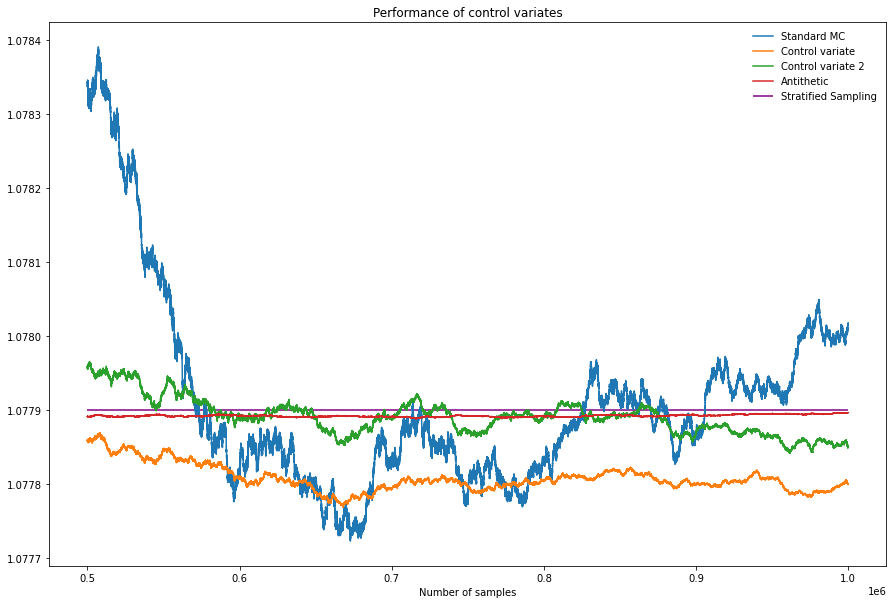

In [13]:
# Instead of starting from a sample size of 1, I am going to start from half of the original sample size
start_plot = nSim // 2

_, ax = plt.subplots(figsize=(15,10))

xx = np.arange(start_plot + 1, nSim + 1)
ax.plot(xx, np.cumsum(Y1)[start_plot:] / xx, label='Standard MC')
ax.plot(xx, np.cumsum(Y1-b*control)[start_plot:] / xx, label='Control variate')
ax.plot(xx, np.cumsum(Y1-b2*control2)[start_plot:] / xx, label='Control variate 2')
ax.plot(xx, np.cumsum((Y1+Y2)/2)[start_plot:] / xx, label='Antithetic')
ax.hlines(sol_Strat, xmin=start_plot, xmax=nSim, color='purple', label='Stratified Sampling')
ax.set_xlabel('Number of samples');
ax.set_title('Performance of control variates');
ax.legend(frameon=False);

|      | Estimation of $I_2$ | Variance of Estimation 
| :--- | :---: | :---: |
| **Stratified Sampling**| $1.07790$ | N/A |
| **Monte Carlo**| $1.07802$ | $9.15284e-08$ |
| **Antithetic**| $1.07790$ | $5.51603e-11$|
| **Control 1**| $1.07780$ | $3.21894e-09$ |
| **Control 2**| $1.07785$ | $7.66845e-09$ |

Looking at the graph, you can clearly see that the antithetic estimation provides the best estimation of $I_2$ even for smaller sample sizes. If we take the Stratified Sampling estimation to be the true value, we can see that the antithetic estimation is almost perfect. Compared to the MC, both control variates perform better however control variate 2 seems to give a better estimation based on the graph although its variance is greater than that of control variate 1.

## Question 2a)

We have been given the function $f:\mathbb{R}\rightarrow\mathbb{R}$,

$$
f(x) = \left \{ \begin{array}{cc}
\frac{\alpha}{\sqrt{1+x}}, & \textrm{ if } x \in (0, 3), \\
0, & \textrm{ if } x \notin (0,3),
\end{array}
\right.
$$

where $\alpha$ is a constant.

For $f$ to be a probability density function, it is necessary that the integral of the function within its support is equal to 1. This gives us
\begin{align}
\int_{0}^{3} \frac{\alpha}{\sqrt{1+x}}  dx &= \alpha \int_{0}^{3} \frac{1}{\sqrt{1+x}}  dx \\
&= \alpha \big{[}2(1+x)^{\frac{1}{2}}\big{]}_{x=0}^{3} \\
&= \alpha (4-2) \\
&= 2\alpha \\
&= 1,
\end{align}
therefore we have $\alpha = \frac{1}{2}$.

## Question 2b)

### Methodology

For Von Neumann's Acceptance-Rejection **(Section 2.5)**, we aim to find an envelope $g(x)$ that gives us the smallest possible value of $c$ that guarantees the inequality $f(x) \leq cg(x) \quad \forall x \in  (0,3)$. This is because we want to maximise the acceptance rate which is given by $\frac{1}{c}$. However, we must also consider the convenience of generating a sample from $g(x)$. We preferably want $g(x)$ to be a distribution such that there are already built in functions to generate samples from $g$ or a distribution that is easy to apply the inverse transform method on.

I have chosen to use the $\mathcal{U}[0, 3]$ distribution as an envelope to generate a sample from $f$. I.e. take 

$$
g(x) = \left \{ \begin{array}{cc}
\frac{1}{3}, & \textrm{ if } x \in (0, 3), \\
0, & \textrm{ if } x \notin (0,3).
\end{array}
\right.
$$

Next, I must minimise the constant $c$ such that it satisfies
\begin{align}
\frac{1}{2\sqrt{1+x}} &\leq c \frac{1}{3-0} \\
\frac{3}{2\sqrt{1+x}} &\leq c.
\end{align}

The LHS is maximised when $x=0$ therefore I take $c^*=\frac{3}{2}$ to be my minimum value. As a result, the acceptance rate is given by $\frac{1}{c^*} = \frac{2}{3}$.

**Von Neumann's acceptance-rejection algorithm**
1. Generate $U \sim \mathcal{U}[0, 1]$
2. Generate $X \sim \mathcal{U}[0, 3]$
3. Accept X if...
\begin{align}
U \leq \frac{f(X)}{cg(X)} = \frac{1}{\sqrt{1+X}}
\end{align}
otherwise reject X.

### Application and Results

The following chunk of code is simple and generates a sample from our desired distribution without using loops and only using vectorised methods making it computationally efficient. The only problem is that the size of the sample is unknown whereas the task requires us to generate specifically 10,000 random variables.

In [14]:
# Timing how long it takes to run this algorithm to compare with other methods
from datetime import datetime
start_time = datetime.now()
nSim = 10**5
rng = np.random.default_rng(seed=56473)
U = rng.random(nSim)
X = rng.random(nSim)*3
Y = np.where(U<=1/np.sqrt(1+X), X, 0)   # Sets Y = X if a certain condition is satisfied, otherwise sets Y = 0
Y = Y[Y!=0]   # Removes all zero values
np.mean(Y)
end_time = datetime.now()

print("The acceptance rate is:", len(Y)/10**5)
print("The sample mean is    :", np.mean(Y))
print("The sample size is    :", len(Y))
print('Duration              : {}'.format(end_time-start_time))

The acceptance rate is: 0.66742
The sample mean is    : 1.331331427950982
The sample size is    : 66742
Duration              : 0:00:00.009973


Instead, I must use a WHILE loop to ensure I get the correct sample size.

In [15]:
start_time = datetime.now()
nSim = 10**4
sample_AR = []
counter = 0

rng = np.random.default_rng(seed=56473)

for i in range(nSim):
    U = rng.random()
    X = rng.random()*3
    counter += 1
    while (U > 1/np.sqrt(1+X)):
        U = rng.random()
        X = rng.random()*3
        counter += 1
    sample_AR.append(X)

end_time = datetime.now()
    
acceptance_rate = len(sample_AR)/counter
print('We needed to generate {} candidates in order to obtain {} samples.'.format(counter, nSim))
print('We accepted {:.4g}% of our samples.'.format((nSim/ counter)*100))
print('The mean is: {:.6g}'.format(np.mean(sample_AR)))
print('Duration: {}'.format(end_time-start_time))

We needed to generate 14855 candidates in order to obtain 10000 samples.
We accepted 67.32% of our samples.
The mean is: 1.33154
Duration: 0:00:00.048868


The second chunk takes MUCH longer to produce 10000 samples than the first chunk to produce 66742. This emphasises how computationally intensive loops are compared to vectorised methods therefore vectorised methods should ideally be used wherever possible.

#### Checking Mean
I have decided to use a Monte-Carlo estimation for the mean of the distribution to check if the first moment of my sample is correct. A further test could be to test higher order moments using a similar method. The expected value is given by
\begin{align}
\mathbb{E} (X) &= \int_0^3 \frac{1}{2 \sqrt{1+x}} x dx \\
&= 3\mathbb{E}\left( \frac{U}{2 \sqrt{1+U}} \right)
\end{align}
therefore the MC estimator is
\begin{align}
\overline{X}_n =3 \frac{1}{n} \sum_{i=1}^{n}  \left( \frac{U_i}{2 \sqrt{1+U_i}} \right)
\end{align}
where $U_i \sim \mathcal{U}(0,3)$ for $i=1, 2, 3 \ldots$

In [16]:
rng = np.random.default_rng(seed=56473)
U = rng.random(10**6)*3

expectation = 3*np.mean((U/(2*np.sqrt(1+U)) + (3-U)/(2*np.sqrt(4-U)))/2)
print('The Expected value is: {:.8g}'.format(expectation))

The Expected value is: 1.3332857


The sample mean is very similar to the MC estimation of the Expectation therefore it is most likely that the sample is correct.

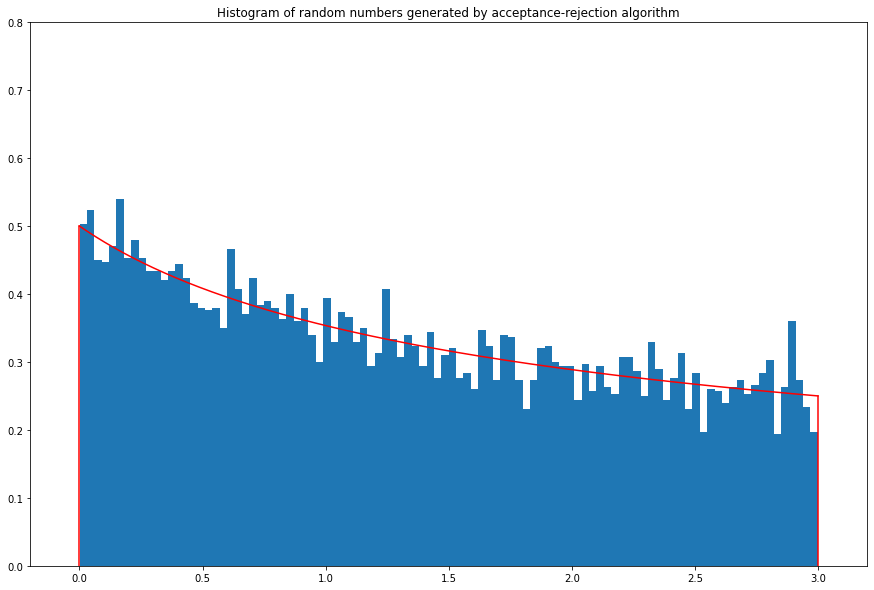

In [17]:
f = lambda x: 1 / (2 * np.sqrt( 1 + x ))
x = np.linspace(0,3, 1000)


_, axs = plt.subplots(figsize=(15, 10))
axs.hist(sample_AR, bins=100, density=True);
axs.set_title('Histogram of random numbers generated by acceptance-rejection algorithm')
axs.set_ylim([0, 0.8]);
axs.set_xlim([-0.2, 3.2]);
axs.plot(x,f(x),color='Red',label='f(x) in (0,3)');
axs.plot([0, 0], [0, f(0)], color = 'red');
axs.plot([3, 3], [0, f(3)], color = 'red')

## Question 2c)

### Methodology

Before applying the inverse transform method **(Section 2.4.3)**, I must first find the CDF of the distribution. For $x \in (0,3)$, we have
\begin{align}
F(x) &= \int_{0}^{x} \frac{1}{2\sqrt{1+v}} dv \\
&= (1+x)^{\frac{1}{2}} -1
\end{align}
hence 
$$
F(x) = \left \{ \begin{array}{cc}
0, &\textrm{ if } x \leq 0 \\
(1+x)^{\frac{1}{2}} -1, &\textrm{ if }  0 < x < 3, \\
1, &\textrm{ if } x \geq 3.
\end{array}
\right.
$$

For $x \in (0,3)$, we have $F^{-1}(X) = (X+1)^2 - 1$. Therefore, if $U \sim \mathcal{U}(0, 1)$, then $X = F^{-1}(U) = (U+1)^2 - 1$ is a sample from $f$.

**Algorithm**
1. Generate $U \sim \mathcal{U}(0, 1)$.
2. Set $X = F^{-1}(U) = (U+1)^2 - 1$

### Application and Results

In [18]:
start_time = datetime.now()
nSim = 10**4
rng = np.random.default_rng(seed=56473)
U = rng.random(nSim)
X = (U+1)**2-1
end_time = datetime.now()
print('The mean is: {:.6g}'.format(np.mean(X)))
print('Duration: {}'.format(end_time-start_time))

The mean is: 1.33596
Duration: 0:00:00.001000


Again, we can see that this sample mean is very similar to the MC estimation of the expectation.

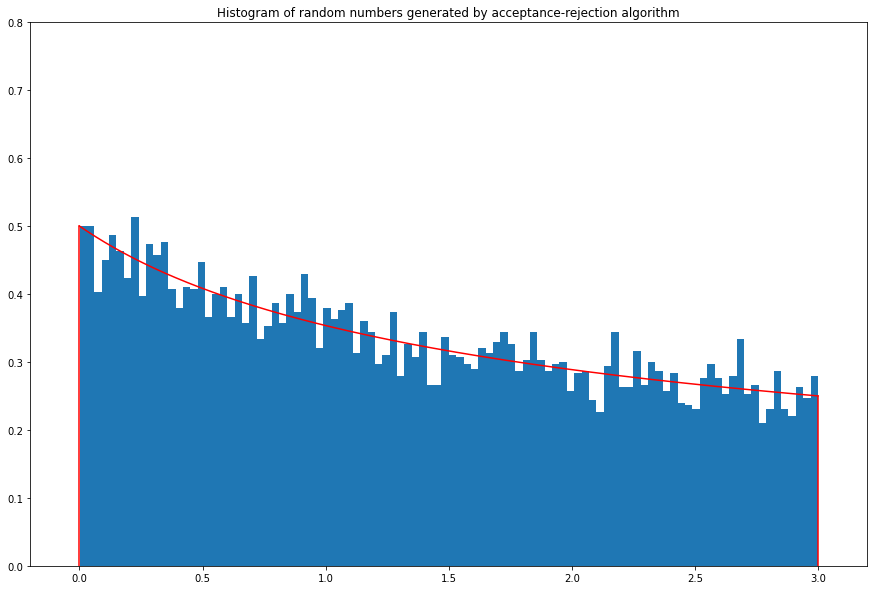

In [19]:
_, axs = plt.subplots(figsize=(15, 10))
axs.hist(X, bins=100, density=True);
axs.set_title('Histogram of random numbers generated by acceptance-rejection algorithm')
axs.set_ylim([0, 0.8]);
axs.set_xlim([-0.2, 3.2]);
axs.plot(x,f(x),color='Red',label='f(x) in (0,3)');
axs.plot([0, 0], [0, f(0)], color = 'red');
axs.plot([3, 3], [0, f(3)], color = 'red')

### Comparison: AR vs Inverse Transform
The graph of the sample from the Inverse Transform method is slightly smoother than that of the acceptance-rejection method therefore favouring the inverse transform method. In addition, the inverse transform method is less computationally challenging since it does not require simulating many candidates that end up being rejected. In other words, the inverse transform method requires us to generate less random variables hence being more computationally efficient. We can see that the inverse transform method is quicker since the duration of the code is a lot smaller for it.

However, it should be noted that not all distributions can be generated using Inverse Transform method since some distributions do not have closed form solutions for the CDF. For example, the normal distribution.

# Question 3a)

First thing to note is that we are in the Black-Scholes world where the stock price follows a geometric brownian motion. Therefore, we have closed-form solutions for the prices of call and put options.

Notice that the payoff $ H = |S_T - K|$ is combination of the payoff of a put and a call with strike price K (this is commonly known as a **straddle** position). I.e.

\begin{align}
 H = |S_T - K| = (S_T-K)^+ + (K - S_T)^+
\end{align}

Therefore the time 0 price, $V_0$, of the european option must equal the total of the price of the put and the call option by no arbitrage. That is,

\begin{align}
V_0 = C_0 + P_0
\end{align}

where $C_0$ and $P_0$ are the prices of the call and put respectively at time 0. Since we are working in the Black-Scholes world, for a risk-neutral measure $\mathbb{Q}$ we have
\begin{align}
V_0 &= \mathbb{E}^\mathbb{Q}(e^{-rT}H) \\
&= \mathbb{E}^\mathbb{Q}(e^{-rT}|S_T-K|) \\
&= \mathbb{E}^\mathbb{Q}(e^{-rT}((S_T-K)^+ + (K - S_T)^+)) \\
&= \mathbb{E}^\mathbb{Q}(e^{-rT}(S_T-K)^+) + \mathbb{E}^\mathbb{Q}(e^{-rT}(K - S_T)^+)) \\
&= C_0 + P_0
\end{align}

which has the general closed-form solutions

\begin{align}
C_0 &= S_0\Phi(d_1) - e^{-rT}K\Phi(d_2) 
\end{align}

and by applying the put-call parity we also have

\begin{align}
P_0 &= -S_0\Phi(-d_1) + e^{-rT}K\Phi(-d_2) 
\end{align}

where 

\begin{align}
d_{1} &= \frac{\log(\frac{S_0}{K}) + (r \pm \frac{\sigma^2}{2})(T)}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align}

and $\Phi(\cdot)$ is the standard normal CDF.

# Question 3b)
### Part i)

Since the price of the option is given by 
\begin{align}
V_0 =  \mathbb{E}^\mathbb{Q}[e^{-rT}|S_T-K|],
\end{align}

the Monte-Carlo estimator **(Section 3.2)** for the option price is
\begin{align}
V_0^{MC} =   \frac{1}{n} \sum_{i=1}^{n} e^{-rT}|S_{T,i} - K| \\
\end{align}
for the stock price, at time of maturity T,
\begin{align}
S_{T,i} = S_0 exp\left((r-\frac{\sigma^2}{2})T + \sigma W_{T,i}\right)
\end{align}
where $ W_{T,i} \sim  \mathcal{N} (0,T) $. $W_{T,i}$ are independent realisations of the Wiener process.

The Monte-Carlo estimator relies on the **Strong Law of Large Numbers** which implies that $V_0^{MC}$ is strongly consistent. I.e.

\begin{align*}
\lim _{n \rightarrow \infty} V_0^{MC} = V_0.
\end{align*}



### Part ii)
For my Monte-Carlo estimator in part i, I need to generate a sample from the normal distribution, $\mathcal{N} (0,T)$. There are multiple methods to doing this such as applying acceptance-rejection using the doubly exponential distribution. I will be using the **Box-Muller (Section 2.6.3)** method in my work. The Box-Muller method transforms two independent standard uniformly random variables into two independent standard normally distributed random variables.

**Algorithm:**
1. Generate independent random variables $U_1, U_2 \sim\mathcal{U}(0,1)$;
2. Set $R = -2\log(U_1)$; 
3. Set $\theta = 2 \pi U_2$;
4. Set $Z_1 = \sqrt{R} \cos (\theta)$; 
5. Set $Z_2 = \sqrt{R} \sin (\theta)$; 
6. Set $W_1 = \sqrt{T}Z_1$ and $W_2 = \sqrt{T}Z_2$ 
7. Return $W_1$ and $W_2$.

We have $W_1, W_2 \sim \mathcal{N} (0,T)$.

The proof of this algorithm involves transforming a double integral using $v = x^2 + y^2$ and $\theta = arctan(\frac{y}{x})$ then setting the integral equal to $1$. I will not go into further detail as it is shown in the lecture notes. Something I think is worth mentioning is the refinement of the **Box-Muller** using the **Polar Form**. This method avoids evaluating two trigonometric functions, which slows down the algorithm, by generating $\cos(\theta)$ and $\sin (\theta)$ using Cartesian coordinates. Again, I will not go into more detail about how to do this as I just wanted to mention alternative methods.

**Criticisms of the Polar method as an improvement to Box-Muller**:
1. It avoids calculating trigonometric functions at the expense of generating 27% more random variables.
2. The polar method involves a loop. The computational cost of this depends on the programming language.

### Part iii)

\begin{align}
\rm{Var}^\mathbb{Q}(V_0^{MC}) &= \rm{Var}^\mathbb{Q}\left(\frac{1}{n}\sum_{i=1}^{n}e^{-rT}|S_{T,i}-K|\right)\\
&=\left(\frac{1}{n}e^{-rT}\right)^2\rm{var}^\mathbb{Q}\left(\sum_{i=1}^{n}|S_{T,i}-K|\right)\\
&=\frac{1}{n^2}e^{-2rT}\sum_{i=1}^{n}\rm{var}^\mathbb{Q}\left(|S_{T,i}-K|\right) \\
&=\frac{1}{n}e^{-2rT}\rm{var}^\mathbb{Q}\left(|S_{T,1}-K|\right) \\
\end{align}

since

\begin{align}
\rm{Cov}^\mathbb{Q} \left( |S_{T,i}-K|, |S_{T,j}-K| \right) = 0
\end{align}

for $i \neq j$. This is because each realization of the stock price, $S_{T,i}$, are IID.

\begin{align}
\rm{var}^\mathbb{Q}\left(|S_{T,1}-K|\right) &= \mathbb{E}^\mathbb{Q}\left(|S_{T,1}-K|^2\right) - \mathbb{E}^\mathbb{Q}\left(|S_{T,1} - K|\right)^2 \\
    &= \mathbb{E}^\mathbb{Q} \left( S_{T,1}^2 - 2KS_{T,1} + K^2 \right) - \left(e^{rT} \mathbb{E}^\mathbb{Q}\left(e^{-rT}|S_{T,1}-K| \right)\right)^2 \\
    &= \mathbb{E}^\mathbb{Q} \left( S_{T,1}^2 \right) -2Ke^{rT}S_0 + K^2 - \left( e^{rT}V_0 \right)^2
\end{align}

since $\mathbb{E}^\mathbb{Q} (e^{-rT}S_{T,1}) = S_0$.

To find $\mathbb{E}^Q \left(S_{T,1}^2\right)$, we must first establish a few properties of the distribution of $S_{T,1}$. Since  \begin{align}
\log S_{T,1} \sim \mathcal{N} \left(\log S_0 + (r - \frac{1}{2} \sigma^2)T, \sigma^2T\right), 
\end{align}
we have 
\begin{align}
\log S_{T,1}^2 = 2\log S_{T,1} \sim \mathcal{N} \left(2\log S_0 + 2(r - \frac{1}{2} \sigma^2)T, 4\sigma^2T\right).
\end{align}

**Recall** that the MGF of a normal distribution is $\mathbb{E}({e^{tX}}) = e^{\mu t + \frac{1}{2} \sigma^2 t^2} $ where $X \sim \mathcal{N}(\mu,\sigma^2)$.

Using the MGF of a normal gives us
\begin{align}
\mathbb{E}^\mathbb{Q} \left (S_{T,1}^2 \right) &= \mathbb{E}^\mathbb{Q} \left( e^{\log S_{T,1}^2} \right) \\
&= \mathbb{E}^\mathbb{Q} \left( e^{2\log S_{T,1}} \right) \\
&= exp \left( 2logS_0 + 2(r - \frac{1}{2} \sigma^2)T + \frac{1}{2} 4 \sigma^2T \right) \\
&= S_0^2exp \left( 2rT + \sigma^2T \right).
\end{align}

Collecting all the terms together, we get
\begin{align}
\rm{var}^\mathbb{Q}(V_0^{MC}) &=   \rm{var}^\mathbb{Q}\left( \frac{1}{n}\sum_{i=1}^{n}e^{-rT}|S_{T,i}-K|\right) \\
&= \frac{1}{n}e^{-2rT} \left( S_0^2exp \left( 2rT + \sigma^2T \right)-2Ke^{rT}S_0 + K^2 - \left( e^{rT}V_0 \right)^2 \right)
\end{align}

### Part iv)
For $\alpha \in (0,1)$ consider the unique number $q_\alpha$ such that

\begin{align}
\Phi (q_\alpha) = 1 - \alpha.
\end{align}

The CLT then yields that $\mu = \mathbb{E}[X]$ belongs to the $1 - 2\alpha$ confidence interval **(Section 3.4)**

\begin{align*}
\left( \overline{X}_n - q_\alpha \frac{\sigma}{\sqrt{n}};\,
\overline{X}_n + q_\alpha \frac{\sigma}{\sqrt{n}} \right)
\end{align*}
as $n \rightarrow \infty$.

Let $\sigma_{MC}^2 = \rm{var}^\mathbb{Q}(V_0^{MC}) $.  Then the $1-2\alpha$ confidence interval for this case is

\begin{align*}
\left( V_0^{MC} - q_\alpha \sigma_{MC};\,
V_0^{MC} + q_\alpha \sigma_{MC} \right).
\end{align*}

For a 95% confidence interval, we have
\begin{align*}
\left( V_0^{MC} - 1.96 \sigma_{MC};\,
V_0^{MC} + 1.96 \sigma_{MC} \right).
\end{align*}

For a 99% confidence interval, we have
\begin{align*}
\left( V_0^{MC} - 2.58 \sigma_{MC};\,
V_0^{MC} + 2.58 \sigma_{MC} \right).
\end{align*}

# Question 3c)
### Part i)

In [20]:
import scipy.stats as stats
def option_Analytic(S0,K,r,σ,T):
    d1 = (np.log(S0/K)+(r+σ**2/2)*T)/(σ*np.sqrt(T))
    C_0 = S0*stats.norm.cdf(d1) - np.exp(-r*T)*K*stats.norm.cdf(d1-σ*np.sqrt(T))
    P_0 = -S0*stats.norm.cdf(-d1) + np.exp(-r*T)*K*stats.norm.cdf(-d1+σ*np.sqrt(T))
    return C_0+P_0

### Part ii)

In [21]:
def option_MC(S0, r, σ, T, K, α):
    W = rng.standard_normal(size=nSim)   # Generating sample from standard normal
    S_T = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * W)   # Calculating stock price from GBM
    MC_samples = np.exp(-r * T) * abs(S_T - K)
    
    V_0 = np.mean(MC_samples)
    
    # Calculating the analytical variance of the estimator
    variance_MC = 1/nSim *np.exp(-2*r*T) * (S0**2*np.exp(2*r*T+σ**2*T) - 2*K*np.exp(r*T)*S0 + K**2 -(np.exp(r*T)*option_Analytic(S0,K,r,σ,T))**2)
    
    # Calculating confidence interval
    lower = V_0 - stats.norm.ppf(1-α) * np.sqrt(variance_MC)
    upper = V_0 + stats.norm.ppf(1-α) * np.sqrt(variance_MC)
    
    # Calculating the sample variance of the estimator
    sample_variance_MC = np.var(MC_samples)/nSim
    
    return V_0, variance_MC, sample_variance_MC, lower, upper

# Question 3d)

### Using Random Number Generator 

In [22]:
S0 =4; K=5; r=0.01; σ=0.2; T=1

V_0 = option_Analytic(S0,K,r,σ,T)

print('The analytical price of the european option is: {:.7g}.'.format(V_0)) 

The analytical price of the european option is: 1.080474.


In [23]:
nSim = 10**6

confidence = 0.95
𝛼 = (1-confidence)/2

rng = np.random.default_rng(seed=56473)
result = option_MC(S0, r, σ, T, K, α)

print('The MC price of the european option is                                  : {:.7g}.'.format(result[0])) 
print('The MC variance of the european option is                               : {:.7g}.'.format(result[1]))
print('The MC sample variance of the european option is                        : {:.7g}.'.format(result[2]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(result[3]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(result[4])) 

The MC price of the european option is                                  : 1.080483.
The MC variance of the european option is                               : 3.885224e-07.
The MC sample variance of the european option is                        : 3.883354e-07.
The lower bound of the 95% confidence interval of the european option is: 1.079262.
The upper bound of the 95% confidence interval of the european option is: 1.081705.


In [24]:
print('The percentage difference in the analytical and MC price is: {:.4g}.'.format((V_0 - result[0])/V_0 *100)) 

The percentage difference in the analytical and MC price is: -0.0008833.


It is very clear that my Monte-Carlo estimation of the price of the european option is very similar to that of the analytical price. In fact, there is only a 0.00088% difference in the prices. In addition, the variance of the MC is extremely small therefore the MC estimation is considered very good.

The MC sample variance and MC variance are very similar therefore supporting my analytical variance derived in part biii.

### Using Box-Muller 
Here I will demonstrate how to use Box-Muller to generate a sample from the standard normal. However, for the rest of the coursework I will use the built in random number generator for convenience.

In [25]:
def option_MC_Box_Muller(S0, r, σ, T, K, α, W):
    S_T = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * W)
    MC_samples = np.exp(-r * T) * abs(S_T - K)
    
    V_0 = np.mean(MC_samples)
    variance_MC = 1/nSim *np.exp(-2*r*T) * (S0**2*np.exp(2*r*T+σ**2*T) - 2*K*np.exp(r*T)*S0 + K**2 -(np.exp(r*T)*option_Analytic(S0,K,r,σ,T))**2)
    
    lower = V_0 - stats.norm.ppf(1-α) * np.sqrt(variance_MC)
    upper = V_0 + stats.norm.ppf(1-α) * np.sqrt(variance_MC)
    
    sample_variance_MC = np.var(MC_samples)/nSim
    
    return V_0, variance_MC, sample_variance_MC, lower, upper

# Generating standard normal using Box-Muller
rng = np.random.default_rng(seed=56473)
U1 = rng.random(500_000)
U2 = rng.random(500_000)
R = -2*np.log(U1)
theta = 2*np.pi*U2
Z1 = np.sqrt(R)*np.cos(theta)
Z2 = np.sqrt(R)*np.sin(theta)
Z = np.concatenate((Z1,Z2))

result_Box_Muller = option_MC_Box_Muller(S0, r, σ, T, K, α, Z)

print('The MC price of the european option is                                  : {:.7g}.'.format(result_Box_Muller[0])) 
print('The MC variance of the european option is                               : {:.7g}.'.format(result_Box_Muller[1]))
print('The MC sample variance of the european option is                        : {:.7g}.'.format(result_Box_Muller[2]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(result_Box_Muller[3]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(result_Box_Muller[4])) 


The MC price of the european option is                                  : 1.080088.
The MC variance of the european option is                               : 3.885224e-07.
The MC sample variance of the european option is                        : 3.889866e-07.
The lower bound of the 95% confidence interval of the european option is: 1.078866.
The upper bound of the 95% confidence interval of the european option is: 1.08131.


# Question 3e)

### Antithetic (Section 4.2)
Since the standard normal distribution is symmetric around 0, if $Z \sim \mathcal{N} (0,1)$ then $-Z \sim \mathcal{N} (0,1)$ also. This gives us the antithetic pair $(Z,-Z)$.

**Note:** I have explained in **1b)** how antithetic variables reduce the variance. The same concept applies here where

\begin{align}
S_{T,i} &= S_0 exp\left((r-\frac{\sigma^2}{2})T + \sigma W_{T,i}\right) \\
S_{T,i}' &= S_0 exp\left((r-\frac{\sigma^2}{2})T - \sigma W_{T,i}\right)
\end{align}

therefore our MC estimator with antithetic variate is given by

\begin{align}
&\overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} e^{-rT}|S_{T,i} - K| \\
&\overline{Y}_n = \frac{1}{n} \sum_{i=1}^{n} e^{-rT}|S_{T,i}' - K| \\
&V_0^{Antithetic} =  \frac{\overline{X}_n+ \overline{Y}_n}{2}.
\end{align}


In [26]:
def option_MC_antithetic(S0, r, σ, T, K):
    rng = np.random.default_rng(seed=56473)
    W = rng.standard_normal(nSim)
    
    S_T1 = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * W)
    S_T2 = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * -W)
    MC_samples1 = np.exp(-r * T) * abs(S_T1 - K)
    MC_samples2 = np.exp(-r * T) * abs(S_T2 - K)
    MC_samples = (MC_samples1 + MC_samples2)/2
    
    return MC_samples.mean(), MC_samples.std() / np.sqrt(nSim)

In [27]:
antithetic = option_MC_antithetic(S0,r,σ,T,K)

print('The antithetic estimation of the price of the option is: {:.7g}.'.format(antithetic[0])) 
print('The standard deviation of the antithetic estimation is : {:.7g}.'.format(antithetic[1])) 

The antithetic estimation of the price of the option is: 1.080671.
The standard deviation of the antithetic estimation is : 0.0002294192.


### Control Variable 1 (Section 4.1)

Again, the concept of control variable and how it works is explained in **1b)**. Since we are working in the Black-Scholes world with risk-neutrality, we know that by FTAP we have $\mathbb{E} (e^{-rT}S_T) = S_0$. Therefore a suitable control variable to apply would be

\begin{align}
Y_i = e^{-rT}S_{T,i} - \mathbb{E}^\mathbb{Q} (e^{-rT}S_{T,i}) =  e^{-rT}S_{T,i} - S_0.
\end{align}

This is a valid control since

\begin{align}
\mathbb{E}^\mathbb{Q} (Y_i) &= \mathbb{E}^\mathbb{Q} (e^{-rT}S_{T,i} - \mathbb{E}^\mathbb{Q} (e^{-rT}S_{T,i}) ) \\
&=  S_0 - S_0 \\
&=  0.
\end{align}

Our control estimator of the price of the european option would therefore be

\begin{align}
V_0^{Control 1} = \frac{1}{n} \sum_{i=1}^{n} \left( e^{-rT}|S_{T,i} - K| - b(e^{-rT}S_{T,i} - S_0) \right).
\end{align}

For the optimal value of b, we take 
\begin{align}
b^* =\frac{ \rm{Cov}(e^{-rT}|S_{T,i} - K|,e^{-rT}S_{T,i}) }{\rm{Var} (e^{-rT}S_{T,i}) }.
\end{align}


In [28]:
def option_MC_control1(S0, r, σ, T, K):
    rng = np.random.default_rng(seed=56473)
    W = rng.standard_normal(nSim) 
    
    S_T = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * W)
    MC_samples = np.exp(-r * T) * abs(S_T - K)
    
    Y = np.exp(-r*T)*S_T - S0
    b = np.cov(MC_samples, Y)[0,1]/np.var(Y)
    
    estimator = MC_samples - b*Y
    
    return estimator.mean(), estimator.std() / np.sqrt(len(estimator))

In [29]:
control1 = option_MC_control1(S0,r,σ,T,K)

print('The control 1 estimation of the price of the option is: {:.7g}.'.format(control1[0])) 
print('The standard deviation of the control 1 estimation is : {:.7g}.'.format(control1[1])) 

The control 1 estimation of the price of the option is: 1.0807.
The standard deviation of the control 1 estimation is : 0.0003793022.


### Control Variable 2

In 3biii), we have shown that $\mathbb{E}^\mathbb{Q} \left (S_{T,1}^2 \right) = S_0^2exp \left( 2rT + \sigma^2T \right)$. Therefore another control variate I can use would be

\begin{align}
Y_i &= S_{T,i}^2 - \mathbb{E}^\mathbb{Q} ( S_{T,i}^2) \\
&= S_{T,i}^2 - S_0^2exp \left( 2rT + \sigma^2T \right)
\end{align}

hence my second control estimator would be

\begin{align}
V_0^{Control 2} = \frac{1}{n} \sum_{i=1}^{n} \left( e^{-rT}|S_{T,i} - K| - b \left(S_{T,i}^2 - S_0^2exp \left( 2rT + \sigma^2T \right) \right) \right).
\end{align}

For the optimal value of b, we take 
\begin{align}
b^* =\frac{ \rm{Cov}(e^{-rT}|S_{T,i} - K|,S_{T,i}^2) }{\rm{Var} (S_{T,i}^2) }.
\end{align}

In [30]:
def option_MC_control2(S0, r, σ, T, K):
    rng = np.random.default_rng(seed=56473)
    W = rng.standard_normal(10**5) 
    
    S_T = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * W)
    MC_samples = np.exp(-r * T) * abs(S_T - K)
    
    control = S_T**2
    b = np.cov(MC_samples, control)[0,1]/np.var(control)
    
    estimator = MC_samples - b*(control - S0**2*np.exp(2*r*T+σ**2*T))
    
    return estimator.mean(), estimator.std() / np.sqrt(len(estimator))

In [31]:
control2 = option_MC_control2(S0, r, σ, T, K)

print('The control 2 estimation of the price of the option is: {:.7g}.'.format(control2[0])) 
print('The standard deviation of the control 2 estimation is : {:.7g}.'.format(control2[1])) 

The control 2 estimation of the price of the option is: 1.081556.
The standard deviation of the control 2 estimation is : 0.00138754.


|      | European option price | Standard Deviation 
| :--- | :---: | :---: |
| **Analytical**| $1.080474$ | N/A |
| **Monte Carlo**| $1.080483$ | $0.000623$ |
| **Antithetic**| $1.080671$ | $0.000229$|
| **Control 1**| $1.080700$ | $0.000379$ |
| **Control 2**| $1.081556$ | $0.001388$ |

A strange result is that the ordinary Monte-Carlo estimate was closest to the analytical price of the european option. Despite this, the variance reduction technique has certainly worked since the standard deviation for antithetic and control 1 is lower than that of Monte-Carlo. However, we can see that Control 2 is a bad estimate relative to the others with rather high standard deivation.

## Question 4a)

### Methodology
We are now leaving the Black-Scholes world. It is difficult to solve the SDE of the dynamic of the stock price in this problem therefore we are unable to use Exact schemes like in question 3. We must resort to using Euler-type schemes to simulate the stock price and estimate the SDE solution.

I will be applying 2 different schemes to simulate sample paths for the stock prices that follows the dynamics under the **risk-neutral measure** given by $ dS_t = rS_t dt + \sigma (1+S_t) dW_t $ where $r$ is the risk-free rate and $\sigma >0$. First note that this dynamic can be written as

\begin{align}
S_t = S_0 + \int_0^t r S_t du +  \int_0^t \sigma (1+S_t) dW_u.
\end{align}

#### Euler Scheme (Section 5.2.1)
The first-order Euler scheme is given by $\hat{S}_0 = S_0$ and

\begin{align}
\hat{S}_{(i+1)h} &= \hat{S}_{ih} + r \hat{S}_{ih} h + \sigma (1+\hat{S}_{ih}) (W_{(i+1)h} - W_{ih}) \\
& =  \hat{S}_{ih} + r \hat{S}_{ih} h + \sigma (1+\hat{S}_{ih}) \sqrt{h} Z_i ,    \qquad i = 0, 1, 2, \ldots.
\end{align}

where $Z_i \sim \mathcal{N}(0,1)$ and $h$ is the step size, that is $ h = \frac{T}{n}$.

However, since $S_t \geq 0$ we need to make a slight adjustment. That is,
\begin{align}
\hat{S}_{(i+1)h} = \max \left( 0, \hat{S}_{ih} + r \hat{S}_{ih} h + \sigma (1+\hat{S}_{ih}) \sqrt{h} Z_i \right).
\end{align}

#### Milstein Scheme (Section 5.2.3)
An improved version of the Euler Scheme is the Milstein scheme which focuses on improving the diffusion term.

The Milstein scheme  is given by $\hat{S}_0 = S_0$ and 

\begin{align}
\hat{S}_{(i+1)h} &= \max \left(0, \hat{S}_{ih} + r \hat{S}_{ih} h + \sigma (1+\hat{S}_{ih}) (W_{(i+1)h} - W_{ih})  +  
\frac{1}{2} \sigma (1+\hat{S}_{ih}) \sigma \left((W_{(i+1)h} - W_{ih})^2 -h\right) \right) \\
&= \max \left(0, \hat{S}_{ih} + r \hat{S}_{ih} h + \sigma (1+\hat{S}_{ih}) \sqrt{h} Z_i + \frac{1}{2} \sigma^2 (1+\hat{S}_{ih}) h (Z_i^2 - 1) \right)
\qquad  i = 0, 1, 2, \ldots
\end{align}
where $Z_i \sim \mathcal{N}(0,1)$ and $h$ is the step size, that is $ h = \frac{T}{n}$.

### Applications and Results

In [32]:
def Euler(z, T, nSteps, r, σ, S0):
    sample = np.zeros(nSteps + 1)  # Pre defining vector of zeros to store values
    sample[0] = S0
    h = T / nSteps
    
    for i in range(nSteps):
        sample[i + 1] = max(0, sample[i] * (1 + (h * r) + (σ * np.sqrt(h) * z[i])) + (σ * np.sqrt(h) * z[i] ))
        
    return sample

In [33]:
def Milstein(z, T, nSteps, r, σ, S0):
    sample = np.zeros(nSteps + 1)
    sample[0] = S0
    h = T / nSteps
    
    for i in range(nSteps):
        sample[i + 1] = max(0, sample[i] * (1 + (h * r) + (σ * np.sqrt(h) * z[i])) + (σ * np.sqrt(h) * z[i] ) + 0.5*σ**2*(sample[i]+1) *h*(z[i]**2-1))
        
    return sample

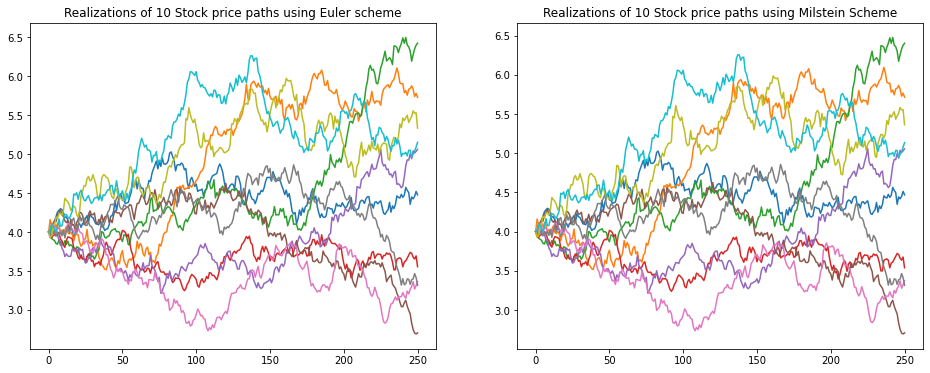

In [34]:
nSims = 10

S0 = 4; r = 0.01; σ = 0.2; T = 1; nSteps = 250

path = np.zeros(n+1)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

rng = np.random.default_rng(seed=56473)

# Plotting each realisation of the stock price paths
for i in range(nSims):
    z = rng.standard_normal(size=nSteps)
    path = Euler(z, T, nSteps, r, σ, S0)
    ax1.plot(path)
ax1.set_title(f'Realizations of {nSims} Stock price paths using Euler scheme');

rng = np.random.default_rng(seed=56473)
for i in range(nSims):
    z = rng.standard_normal(size=nSteps)
    path = Milstein(z, T, nSteps, r, σ, S0)
    ax2.plot(path)
ax2.set_title(f'Realizations of {nSims} Stock price paths using Milstein Scheme');


# Question 4b)

Since the new dynamic is still under the **risk-neutral measure**, we still have $V_0 = \mathbb{E}^\mathbb{Q} \left( e^{-rT} |S_T - K| \right)$. Therefore the Monte-Carlo estimator remains the same as that from 3bi). That is

\begin{align*}
    V^{\textrm{MC}}_0(n) = \frac{1}{n} \sum_{i=1}^n e^{-rT} |S_{T,i} - K|,
\end{align*}

where $S_{T,i}$ are independent realizations of the stock price at time of maturity, $T$.

The only thing that is different in this question is the dynamics of the stock price. The price of the stock is now given by

\begin{align}
S_t = S_0 + \int_0^t r S_t du +  \int_0^t \sigma (1+S_t) dW_u.
\end{align}

which has no closed-form solution for the price of call and put options. Therefore we can no longer compute the european option price analytically like we did in 3a). To obtain the stock price at maturity, $T$, we must now apply Euler-type Schemes.

# Question 4c)

#### Euler Scheme

In [35]:
def option_price_Euler(K,α):
    option_payoff = np.zeros(nSim)
    
    rng = np.random.default_rng(seed=56473)
    
    for i in range(nSim):
        Z = rng.standard_normal(size=nsteps)
        S = Euler(Z, T, nsteps, r, σ, S0)   
        option_payoff[i] = np.exp(-r * T) * abs(S[-1]-K)
        
    option_price_MC = np.mean(option_payoff)
    MC_std = option_payoff.std() / np.sqrt(nSim)
    
    lower = option_price_MC - stats.norm.ppf(1-𝛼)*MC_std
    upper = option_price_MC + stats.norm.ppf(1-𝛼)*MC_std
    
    return option_price_MC, MC_std, lower, upper

In [36]:
nSim = 10**4
nsteps = 250

confidence = 0.95
𝛼 = (1-confidence)/2

S0 = 4; K=5; r=0.01; σ = 0.2; T=1

Euler_Result = option_price_Euler(K,α)

print('The MC estimation of the price of the european option is                : {:.7g}.'.format(Euler_Result[0])) 
print('The MC standard deviation of the estimation is                          : {:.7g}.'.format(Euler_Result[1]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Euler_Result[2]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Euler_Result[3]))

The MC estimation of the price of the european option is                : 1.175995.
The MC standard deviation of the estimation is                          : 0.007334558.
The lower bound of the 95% confidence interval of the european option is: 1.161619.
The upper bound of the 95% confidence interval of the european option is: 1.19037.


#### Milstein Scheme

In [37]:
def option_price_Milstein(K,α):
    option_payoff = np.zeros(nSim)
    
    rng = np.random.default_rng(seed=56473)

    for i in range(nSim):
        Z = rng.standard_normal(size=nsteps)
        S = Milstein(Z, T, nsteps, r, σ, S0)   # we use the exact scheme from above
        option_payoff[i] = np.exp(-r * T) * abs(S[-1]-K)
        
    option_price_MC = option_payoff.mean()
    MC_std = option_payoff.std() / np.sqrt(nSim)
    
    lower = option_price_MC - stats.norm.ppf(1-𝛼)*MC_std
    upper = option_price_MC + stats.norm.ppf(1-𝛼)*MC_std
    
    return option_price_MC, MC_std, lower, upper

In [38]:
Milstein_Result = option_price_Milstein(K,α)

print('The MC estimation of the price of the european option is                : {:.7g}.'.format(Milstein_Result[0])) 
print('The MC standard deviation of the estimation is                          : {:.7g}.'.format(Milstein_Result[1]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Milstein_Result[2]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Milstein_Result[3]))

The MC estimation of the price of the european option is                : 1.176125.
The MC standard deviation of the estimation is                          : 0.007334625.
The lower bound of the 95% confidence interval of the european option is: 1.16175.
The upper bound of the 95% confidence interval of the european option is: 1.190501.


## Question 4d)

### Control 1
Since we are now working with a new dynamic for the stock price for which we cannot solve the SDE, we only have a limited number of control variables to choose from since we do not know much about the distribution of the stock price. Since the new dynamic is still under the risk-neutral measure, we still have that $\mathbb{E}^\mathbb{Q} (e^{-rT}S_T) = S_0$. Hence we can reuse the control in problem 3e). That is,

\begin{align}
Y_i = e^{-rT}S_{T,i} - \mathbb{E}^\mathbb{Q} (e^{-rT}S_{T,i}) =  e^{-rT}S_{T,i} - S_0.
\end{align}

Our control estimator of the price of the european option would therefore be

\begin{align}
V_0^{Control 1} = \frac{1}{n} \sum_{i=1}^{n} \left( e^{-rT}|S_{T,i} - K| - b(e^{-rT}S_{T,i} - S_0) \right).
\end{align}

For the optimal value of b, we take 
\begin{align}
b^* =\frac{ \rm{Cov}(e^{-rT}|S_{T,i} - K|,e^{-rT}S_{T,i}) }{\rm{Var} (e^{-rT}S_{T,i}) }.
\end{align}


In [39]:
def option_price_Control1(K,α):
    option_payoff = np.zeros(nSim)
    control_variate = np.zeros(nSim)
    
    rng = np.random.default_rng(seed=56473)

    for i in range(nSim):
        Z = rng.standard_normal(size=nsteps)
        S = Euler(Z, T, nsteps, r, σ, S0)   # we use the exact scheme from above
        option_payoff[i] = np.exp(-r * T) * abs(S[-1]-K)
        control_variate[i] = np.exp(-r*T) * S[-1]
        
    b = np.cov(option_payoff, control_variate)[0,1]/np.var(control_variate)
    
    estimator = option_payoff - b*(control_variate-S0)
    option_price_Control1 = estimator.mean()
    Control1_std = estimator.std() / np.sqrt(nSim)
    
    lower = option_price_Control1 - stats.norm.ppf(1-𝛼)*Control1_std
    upper = option_price_Control1 + stats.norm.ppf(1-𝛼)*Control1_std
    
    return option_price_Control1, Control1_std, lower, upper

In [40]:
Control1 = option_price_Control1(K,α)

print('The MC estimation of the price of the european option for Control 1 is  : {:.7g}.'.format(Control1[0])) 
print('The MC standard deviation of the estimation is                          : {:.7g}.'.format(Control1[1]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control1[2]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control1[3]))

The MC estimation of the price of the european option for Control 1 is  : 1.181536.
The MC standard deviation of the estimation is                          : 0.005439422.
The lower bound of the 95% confidence interval of the european option is: 1.170875.
The upper bound of the 95% confidence interval of the european option is: 1.192198.


### Control 2
For the next part, I will be extra rigorous compared to the rest of the coursework. First I want to establish that

\begin{align}
S_t = \mathbb{E}_t^\mathbb{Q} (e^{-r(t'-t)}S_{t'}) \qquad \forall t' \in [t,T]
\end{align}

therefore we have 

\begin{align}
S_0 = \mathbb{E}_0^\mathbb{Q} (e^{-rt}S_t) \qquad \forall t \in [0,T].
\end{align}

Therefore a suitable control is

\begin{align}
Y_i = e^{-rt}S_{t,i} - \mathbb{E}_0^\mathbb{Q} (e^{-rt}S_t) = e^{-rt}S_{t,i} - S_0 \qquad \forall t \in (0,T].
\end{align}

The control I will be using is the second to last interval's stock price. For the given parameters in the question, that is

\begin{align}
Y_i  = e^{-r \frac{249}{250}}S_{249} - S_0.
\end{align}

Our control estimator of the price of the european option would therefore be

\begin{align}
V_0^{Control 1} = \frac{1}{n} \sum_{i=1}^{n} \left( e^{-rT}|S_{T,i} - K| - b^*(e^{-r \frac{249}{250}}S_{249} - S_0) \right)
\end{align}

where 

\begin{align}
b^* =\frac{ \rm{Cov} \left(e^{-rT}|S_{T,i} - K|,e^{-r \frac{249}{250}}S_{249} \right) }{\rm{Var} \left (e^{-r \frac{249}{250}}S_{249} \right) }.
\end{align}

**Note**: The stock price at different points in time follow a different distribution therefore they are different random variables.

In [41]:
def option_price_Control2(K,α):
    option_payoff = np.zeros(nSim)
    control_variate = np.zeros(nSim)
    
    rng = np.random.default_rng(seed=56473)

    for i in range(nSim):
        Z = rng.standard_normal(size=nsteps)
        S = Milstein(Z, T, nsteps, r, σ, S0)   # we use the exact scheme from above
        option_payoff[i] = np.exp(-r * T) * abs(S[-1]-K)
        control_variate[i] = np.exp(-r*T*249/250) * S[-2]
        
    b = np.cov(option_payoff, control_variate)[0,1]/np.var(control_variate)
    
    estimator = option_payoff - b*(control_variate-S0)
    option_price_Control2 = estimator.mean()
    Control2_std = estimator.std() / np.sqrt(nSim)
    
    lower = option_price_Control2 - stats.norm.ppf(1-𝛼)*Control2_std
    upper = option_price_Control2 + stats.norm.ppf(1-𝛼)*Control2_std
    
    return option_price_Control2, Control2_std, lower, upper

In [42]:
Control2 = option_price_Control2(K,α)

print('The MC estimation of the price of the european option for Control 2 is  : {:.7g}.'.format(Control2[0])) 
print('The MC standard deviation of the estimation is                          : {:.7g}.'.format(Control2[1]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control2[2]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control2[3]))

The MC estimation of the price of the european option for Control 2 is  : 1.181416.
The MC standard deviation of the estimation is                          : 0.005455397.
The lower bound of the 95% confidence interval of the european option is: 1.170723.
The upper bound of the 95% confidence interval of the european option is: 1.192108.


# Control Variable 3

Although only 2 control variables were asked for, I think it is worth mentioning a third which is completely different to any control variates I have used so far. Another control would be the sum of Brownian Motions. That is 

\begin{align}
\sum_{i=1}^{n} (\hat{W}_{t_i} -\hat{W}_{t_{i-1}}) = \hat{W}_{T} - \hat{W}_{t_0} = \hat{W}_{T} \sim \mathcal{N} (0,T).
\end{align}

which gives us the estimator

\begin{align}
Y_i = \hat{W}_{T,i} - \mathbb{E} (\hat{W}_{T}) = \hat{W}_{T,i} - 0 = \hat{W}_{T,i} = \sqrt{T} \hat{Z}_{T,i}.
\end{align}


In [45]:
def option_price_Control3(K,α):
    option_payoff = np.zeros(nSim)
    control_variate = np.zeros(nSim)
    
    rng = np.random.default_rng(seed=56473)

    for i in range(nSim):
        Z = rng.standard_normal(size=nsteps)
        S = Milstein(Z, T, nsteps, r, σ, S0)   # we use the exact scheme from above
        option_payoff[i] = np.exp(-r * T) * abs(S[-1]-K)
        control_variate[i] = np.sum(np.sqrt(T)*Z)
        
    b = np.cov(option_payoff, control_variate)[0,1]/np.var(control_variate)
    
    estimator = option_payoff - b*(control_variate)
    option_price_Control3 = estimator.mean()
    Control3_std = estimator.std() / np.sqrt(nSim)
    
    lower = option_price_Control3 - stats.norm.ppf(1-𝛼)*Control3_std
    upper = option_price_Control3 + stats.norm.ppf(1-𝛼)*Control3_std
    
    return option_price_Control3, Control3_std, lower, upper

In [46]:
Control3 = option_price_Control3(K,α)

print('The MC estimation of the price of the european option for Control 2 is  : {:.7g}.'.format(Control3[0])) 
print('The MC standard deviation of the estimation is                          : {:.7g}.'.format(Control3[1]))
print('The lower bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control3[2]))
print('The upper bound of the 95% confidence interval of the european option is: {:.7g}.'.format(Control3[3]))

The MC estimation of the price of the european option for Control 2 is  : 1.181484.
The MC standard deviation of the estimation is                          : 0.004818444.
The lower bound of the 95% confidence interval of the european option is: 1.17204.
The upper bound of the 95% confidence interval of the european option is: 1.190927.


### Comparison
|      | European option price | Standard Deviation 
| :--- | :---: | :---: |
| **Monte Carlo**| $1.1760$ | $0.007335$ |
| **Control 1**| $1.1815$ | $0.005439$|
| **Control 2**| $1.1814$ | $0.005455$ |
| **Control 3**| $1.1815$ | $0.004818$ |

From the table above, you can see that all 3 controls give a very similar estimate of the option price which is relatively far from the standard MC estimation. Additionally, the all the control variates reduce the variance of the MC estimator however control variate 3 reduces it by the most. It is expected that Control 1 and Control 2 yield very similar results as they are based on a similar concept.